## Assignment 1 - World in data
1. Download some data related to GDP per capita and life expectancy.
    1. Write a Python program that draws a scatter plot of GDP per capita vs life expectancy. State any assumptions and motivate decisions that you make 
when selecting data to be plotted, and in combining data. [1p]
    1. Consider whether the results obtained seem reasonable and discuss what 
might be the explanation for the results you obtained. [1p]

First, we need to decide which data to show. We choose to show an average of the life expenctancy and GDP for the years 2010-2020 instead of any single year. The goal is to not let a single outlier year affect the visualisation

In [60]:
import csv
 
# Indexes in data
NAME = 0
CODE = 1
YEAR = 2
LIFE = 3
GDP  = 4

 
def filterFunc(row):
  if int(row[YEAR]) < 2010 or int(row[YEAR]) >= 2020: # Only interested in years 2010-2019
    return False
  if row[CODE] == "" or "OWID_" in row[CODE]: # Remove rows with no country code, which seems to remove geographical areas other than countries
    return False
  if row[LIFE] == "" or row[GDP] == "":
    return False  

  #print(row)
  return True

def aggregateData(data):
  aggregatedData = []
  lives = []
  GDPs = []

  first = next(data)
  currentCountry = first[NAME]
  currentCode = first[CODE]
  currentLife = float(first[LIFE])
  currentGDP = float(first[GDP])
  numberOfRows = 1

  for row in data:
    if row[CODE] != currentCode:
      aggregatedData.append(
        [currentCode, currentCountry, currentLife/numberOfRows, currentGDP/numberOfRows]
      )
      lives.append(currentLife/numberOfRows)
      GDPs.append(currentGDP/numberOfRows)
      numberOfRows = 0
      currentCode = row[CODE]
      currentCountry = row[NAME]
      currentLife = 0
      currentGDP = 0

    currentLife += float(row[LIFE])
    currentGDP += float(row[GDP])
    numberOfRows += 1
  aggregatedData.append(
    [currentCode, currentCountry, currentLife/numberOfRows, currentGDP/numberOfRows]
  )
  lives.append(currentLife/numberOfRows)
  GDPs.append(currentGDP/numberOfRows)
  return aggregatedData, lives, GDPs


aData = []
lives = []
GDPs = []
# opening the CSV file
with open('data.csv', mode ='r')as file:
   
  # reading the CSV file
  dataFile = csv.reader(file)
  next(dataFile, None)

  filteredData = filter(filterFunc, dataFile)
  # print(len(list(filteredData)))
  aData, lives, GDPs = aggregateData(filteredData)

  print(aData)

 


[['AFG', 'Afghanistan', 62.87577777777777, 1913.107988888889], ['ALB', 'Albania', 77.67833333333333, 9994.139933333334], ['DZA', 'Algeria', 75.85466666666667, 13693.22221111111], ['AGO', 'Angola', 58.47, 8218.61588888889], ['ARG', 'Argentina', 75.90722222222222, 19308.031211111112], ['ARM', 'Armenia', 74.21122222222223, 9714.29051111111], ['AUS', 'Australia', 82.62188888888889, 47771.84846666667], ['AUT', 'Austria', 81.07044444444445, 41546.31008888889], ['AZE', 'Azerbaijan', 71.97600000000001, 16724.022122222224], ['BHR', 'Bahrain', 76.6181111111111, 38602.91076666667], ['BGD', 'Bangladesh', 71.17500000000001, 3277.9457444444442], ['BRB', 'Barbados', 78.71866666666666, 11909.067322222221], ['BLR', 'Belarus', 72.97588888888889, 18136.906933333335], ['BEL', 'Belgium', 80.78633333333332, 38464.854877777776], ['BEN', 'Benin', 60.36933333333333, 2000.1572444444444], ['BOL', 'Bolivia', 69.77600000000001, 5950.211477777778], ['BIH', 'Bosnia and Herzegovina', 76.68844444444446, 9431.245955555

In [61]:
maxGdp = aData[0]
maxLife = aData[0]
for row in aData:
  if(row[2] > maxLife[2]):
    maxLife = row
  if(row[3] > maxGdp[3]):
    maxGdp = row

print("Max LIFE", maxLife)
print("Max GDP:", maxGdp)

Max LIFE ['HKG', 'Hong Kong', 83.80022222222223, 46949.94726666666]
Max GDP: ['QAT', 'Qatar', 79.62744444444445, 152694.10871111113]


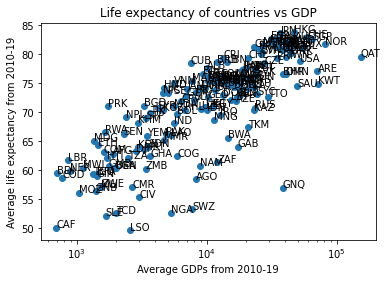

In [69]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(GDPs, lives)
plt.title("Life expectancy of countries vs GDP")
plt.xlabel("Average GDPs from 2010-19")
plt.ylabel("Average life expectancy from 2010-19")
plt.xscale("log")
for row in aData:
  plt.annotate(row[0], (row[3], row[2]))
plt.show()
